# Flight Delay Prediction

In [ ]:
# Import packages 
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import random
from sklearn.model_selection import train_test_split
import seaborn as sns

In [ ]:
#Loading original dataset
df_prep=pd.read_csv('FlightDelays.csv')

## Data Preprocessing

In [ ]:
df_prep.shape

(2201, 13)

In [ ]:
df_prep.head()

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight Status
0,1455,OH,1455,JFK,184,37987,5935,BWI,0,4,1,N940CA,ontime
1,1640,DH,1640,JFK,213,2004-01-01,6155,DCA,0,4,1,N405FJ,ontime
2,1245,DH,1245,LGA,229,2004-01-01,7208,IAD,0,4,1,N695BR,ontime
3,1715,DH,1709,LGA,229,2004-01-01,7215,IAD,0,4,1,N662BR,ontime
4,1039,DH,1035,LGA,229,2004-01-01,7792,IAD,0,4,1,N698BR,ontime


In [ ]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201 entries, 0 to 2200
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CRS_DEP_TIME   2201 non-null   int64 
 1   CARRIER        2201 non-null   object
 2   DEP_TIME       2201 non-null   int64 
 3   DEST           2201 non-null   object
 4   DISTANCE       2201 non-null   int64 
 5   FL_DATE        2201 non-null   object
 6   FL_NUM         2201 non-null   int64 
 7   ORIGIN         2201 non-null   object
 8   Weather        2201 non-null   int64 
 9   DAY_WEEK       2201 non-null   int64 
 10  DAY_OF_MONTH   2201 non-null   int64 
 11  TAIL_NUM       2201 non-null   object
 12  Flight Status  2201 non-null   object
dtypes: int64(7), object(6)
memory usage: 223.7+ KB


In [ ]:
# Checking for null values
df_prep.isnull().values.any()

False

In [ ]:
# Checking for duplicates
duplicated=df_prep.duplicated(keep='first')
duplicated.sum()

0

In [ ]:
#Checking for outliers
df_prep.describe()

,CRS_DEP_TIME,DEP_TIME,DISTANCE,FL_NUM,Weather,DAY_WEEK,DAY_OF_MONTH
count,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000
mean,1371.938664,1369.298955,211.871422,3815.086324,0.014539,3.905498,16.024989
std,432.697149,442.462754,13.316815,2409.750224,0.119725,1.903149,8.677390
min,600.000000,10.000000,169.000000,746.000000,0.000000,1.000000,1.000000
25%,1000.000000,1004.000000,213.000000,2156.000000,0.000000,2.000000,8.000000
50%,1455.000000,1450.000000,214.000000,2385.000000,0.000000,4.000000,16.000000
75%,1710.000000,1709.000000,214.000000,6155.000000,0.000000,5.000000,23.000000
max,2130.000000,2330.000000,229.000000,7924.000000,1.000000,7.000000,31.000000


In [ ]:
df_prep.columns

Index(['CRS_DEP_TIME', 'CARRIER', 'DEP_TIME', 'DEST', 'DISTANCE', 'FL_DATE',
       'FL_NUM', 'ORIGIN', 'Weather', 'DAY_WEEK', 'DAY_OF_MONTH', 'TAIL_NUM',
       'Flight Status'],
      dtype='object')

<AxesSubplot:>

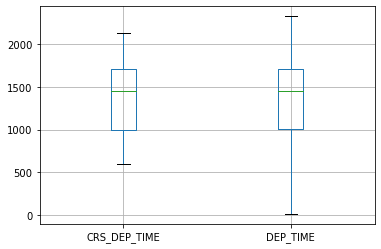

In [ ]:
df_prep.boxplot(column=['CRS_DEP_TIME', 'DEP_TIME'])

<AxesSubplot:>

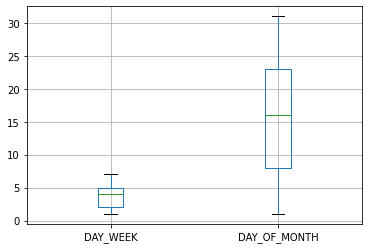

In [ ]:
df_prep.boxplot(column=['DAY_WEEK', 'DAY_OF_MONTH'])

<AxesSubplot:>

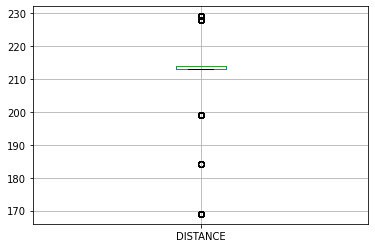

In [ ]:
df_prep.boxplot(column=['DISTANCE'])

(array([ 115.,    0.,   30.,    0.,    0.,  256.,    0., 1408.,    0.,
         392.]),
 array([169., 175., 181., 187., 193., 199., 205., 211., 217., 223., 229.]),
 <BarContainer object of 10 artists>)

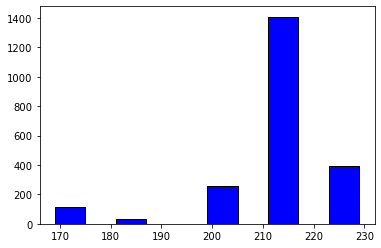

In [ ]:
plt.hist(df_prep['DISTANCE'], color='blue', edgecolor='black')

## Data Handling

In [ ]:
#All flights were recorded in Jan 2004 (Quarter 1) - Therefore this is not a significant feature.
#Drop date, year, month and quarter. Keeping day fo the week only.
df_prep=df_prep.drop(columns=['FL_DATE'])

In [ ]:
#Time Handling - Creating a category variable (Day_Hr). Assign CRS_DEP_TIME variable to a category. 

In [ ]:
df_prep['DAY_HR'] = df_prep['CRS_DEP_TIME'].astype(str).str[:-2].astype(np.int64)
df_prep['DAY_HR'] = pd.to_numeric(df_prep['DAY_HR'])
df_prep.sample(5)

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight Status,DAY_HR
786,1830,DL,1830,LGA,214,1764,DCA,0,1,12,N223DZ,ontime,18
894,1300,US,1255,LGA,214,2172,DCA,0,2,13,N737UW,ontime,13
1576,2100,US,2139,LGA,214,2188,DCA,0,4,22,N762UW,delayed,21
1546,2030,DL,2033,LGA,214,1768,DCA,0,4,22,N3734B,ontime,20
1675,645,RU,641,EWR,199,2761,DCA,0,5,23,N14993,ontime,6


In [ ]:
df_prep['DAY_HR'] = df_prep['DAY_HR'].map({6: 'Early Morning', 7: 'Early Morning', 8: 'Early Morning',9: 'Early Morning', 
                                           10: 'Late Morning', 11: 'Late Morning', 12: 'Late Morning', 13: 'Early Afternoon',
                                          14: 'Early Afternoon', 15: 'Early Afternoon', 16: 'Late Afternoon', 17: 'Late Afternoon',
                                          18: 'Late Afternoon', 19: 'Evening', 20: 'Evening', 21: 'Evening', 22: 'Late Evening', 23: 'Late Evening',
                                          24: 'Late Evening', 1: 'Late Night', 2: 'Late Night', 3: 'Late Night', 4: 'Toward Morning', 
                                           5: 'Toward Morning'})
df_prep.sample(5)

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight Status,DAY_HR
308,640,DH,635,LGA,229,7790,IAD,0,2,6,N676BR,ontime,Early Morning
1116,1300,MQ,1315,LGA,214,4964,DCA,0,5,16,N732MQ,delayed,Early Afternoon
52,1245,DH,1249,LGA,229,7208,IAD,0,5,2,N688BR,ontime,Late Morning
732,1500,US,1452,LGA,214,2176,DCA,0,7,11,N722UW,ontime,Early Afternoon
1248,1900,US,1855,LGA,214,2184,DCA,0,7,18,N755UW,ontime,Evening


# Feature Selection - Categorical Variables - Chi Squared

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:

from sklearn.feature_selection import chi2

In [ ]:
## Create a subset with the categorcial variables by droping the numerical and dates.
df_chi=df_prep.drop(['CRS_DEP_TIME','DEP_TIME','DISTANCE'], axis=1)

In [ ]:
## Convert the strings into numbers/codes
label_encoder = LabelEncoder()
df_chi['Flight Status'] = label_encoder.fit_transform(df_chi['Flight Status'])
df_chi['CARRIER'] = label_encoder.fit_transform(df_chi['CARRIER'])
df_chi['ORIGIN'] = label_encoder.fit_transform(df_chi['ORIGIN'])
df_chi['DEST'] = label_encoder.fit_transform(df_chi['DEST'])
df_chi['TAIL_NUM'] = label_encoder.fit_transform(df_chi['TAIL_NUM'])
df_chi['DAY_HR'] = label_encoder.fit_transform(df_chi['DAY_HR'])

In [ ]:
df_chi.head()

,CARRIER,DEST,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight Status,DAY_HR
0,4,1,5935,0,0,4,1,525,1,0
1,1,1,6155,1,0,4,1,262,1,3
2,1,2,7208,2,0,4,1,381,1,4
3,1,2,7215,2,0,4,1,349,1,3
4,1,2,7792,2,0,4,1,384,1,4


In [ ]:
#Declaring X and y to apply the method
X_chi = df_chi.drop('Flight Status',axis=1)
y_chi = df_chi['Flight Status']

In [ ]:
chi_scores = chi2(X_chi,y_chi)

In [ ]:
# First Array contains chi sqaures and second array p values. Higher p values means uncertainty. Variables selected need to have p values under 0.05
chi_scores

(array([3.60615533e+01, 1.24279196e+01, 3.37501704e+04, 1.79916077e+00,
        1.32560748e+02, 3.38906237e+00, 4.58492312e+01, 1.02927736e+00,
        1.73673711e+00]),
 array([1.91181897e-09, 4.22962808e-04, 0.00000000e+00, 1.79813986e-01,
        1.12801633e-30, 6.56302609e-02, 1.27713237e-11, 3.10328455e-01,
        1.87552788e-01]))

In [ ]:
df_prep.columns

Index(['CRS_DEP_TIME', 'CARRIER', 'DEP_TIME', 'DEST', 'DISTANCE', 'FL_NUM',
       'ORIGIN', 'Weather', 'DAY_WEEK', 'DAY_OF_MONTH', 'TAIL_NUM',
       'Flight Status', 'DAY_HR'],
      dtype='object')

In [ ]:
labels = ['CARRIER','DEST', 'FL_NUM','ORIGIN', 'Weather', 'DAY_WEEK', 'DAY_OF_MONTH', 'TAIL_NUM','DAY_HR']
p_values = pd.Series(chi_scores[1], index=labels)  #,index = X.columns)
p_values.sort_values(ascending = False , inplace = True)
p_values

TAIL_NUM        3.103285e-01
DAY_HR          1.875528e-01
ORIGIN          1.798140e-01
DAY_WEEK        6.563026e-02
DEST            4.229628e-04
CARRIER         1.911819e-09
DAY_OF_MONTH    1.277132e-11
Weather         1.128016e-30
FL_NUM          0.000000e+00
dtype: float64

<AxesSubplot:>

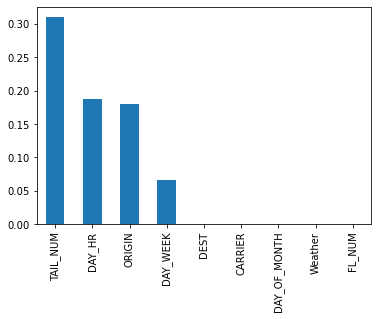

In [ ]:
## based on the plot we should remove Tail_NUm, Origin, day_hr,day_week. 
p_values.plot.bar()

## Feature Selection - Evaluating Numerical Variables

In [ ]:
#Create a subset with the categorcial variables by droping the numerical and dates.
df_anova = df_prep[['DISTANCE', 'Flight Status']]
df_anova.head()

,DISTANCE,Flight Status
0,184,ontime
1,213,ontime
2,229,ontime
3,229,ontime
4,229,ontime


In [ ]:
#Finding correlation coeficient betweend distance and flight number. 
df_anova.corr()

,DISTANCE
DISTANCE,1.0


In [ ]:
import scipy.stats as stats

stats.f_oneway(df_anova['DISTANCE'][df_anova['Flight Status'] == 'ontime'], 
               df_anova['DISTANCE'][df_anova['Flight Status'] == 'delayed'])

F_onewayResult(statistic=0.7769818513895419, pvalue=0.3781621230476707)

In [ ]:
#Distances shows low correlation with the dependant variable. Therefore the decision is to remove it from the selected features. 

In [ ]:
#Final features selected are: CARRIER, DEST, FL_NUM, Weather, DAY_OF_MONTH, ORIGIN, DAY_HR Flight Status

#Date was eliminated after realizing all data points are from Jan 2014 (Quarter 1), the only variable keept was Day of the Month

#Scheduled time was converted into a categorical variable with 8 possible values (Early Morning, Late Morning, Early Afternoon, etc.)

#Actual time was eliminated through domain knowledge since it is useful for determining flight status but no for predicting it

#Using Pvalue of Chi2 TAIL_NUM, DAY_HR ORIGIN and DAY_WEEK were identified as non-relevant, only ORIGIN and DAY_HR were kept since
#we think they might still be valuable

#Using ANOVA Distance was eliminated since it doesn't have a significant influence on te dependant variable



In [ ]:
df_training = df_prep[['CARRIER', 'DEST', 'FL_NUM', 'Weather', 'DAY_OF_MONTH','DAY_HR','ORIGIN','Flight Status']]
df_training.sample(5) 

,CARRIER,DEST,FL_NUM,Weather,DAY_OF_MONTH,DAY_HR,ORIGIN,Flight Status
617,RU,EWR,2403,0,9,Early Afternoon,BWI,ontime
1349,DH,LGA,7211,0,20,Early Afternoon,IAD,ontime
1333,DH,EWR,7305,0,19,Early Morning,IAD,ontime
1640,MQ,LGA,4972,0,23,Late Afternoon,DCA,ontime
1415,DH,EWR,7302,0,20,Late Afternoon,IAD,ontime


In [ ]:
# Export cleaned dataset as a csv
df_training.to_csv(r'C:\Users\may93\Downloads\FlightDelaysTrainingData.csv', index=False)

In [ ]:
df_trainingnum = df_prep[['CARRIER', 'DEST', 'FL_NUM', 'Weather', 'DAY_OF_MONTH','DAY_HR','ORIGIN','Flight Status']]

In [ ]:
label_encoder = LabelEncoder()
df_trainingnum['Flight Status'] = label_encoder.fit_transform(df_trainingnum['Flight Status'])
df_trainingnum['ORIGIN'] = label_encoder.fit_transform(df_trainingnum['ORIGIN'])
df_trainingnum['DEST'] = label_encoder.fit_transform(df_trainingnum['DEST'])
df_trainingnum['DAY_HR'] = label_encoder.fit_transform(df_trainingnum['DAY_HR'])
df_trainingnum['CARRIER'] = label_encoder.fit_transform(df_trainingnum['CARRIER'])
df_trainingnum.sample(5)

C:\Users\kadam\AppData\Local\Temp\ipykernel_18936\4110462449.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trainingnum['Flight Status'] = label_encoder.fit_transform(df_trainingnum['Flight Status'])
C:\Users\kadam\AppData\Local\Temp\ipykernel_18936\4110462449.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trainingnum['ORIGIN'] = label_encoder.fit_transform(df_trainingnum['ORIGIN'])
C:\Users\kadam\AppData\Local\Temp\ipykernel_18936\4110462449.py:4: SettingWithCopyWarning: 
A value is trying 

,CARRIER,DEST,FL_NUM,Weather,DAY_OF_MONTH,DAY_HR,ORIGIN,Flight Status
866,2,2,1756,0,13,0,1,1
117,1,1,7806,0,3,4,2,1
537,0,0,806,0,8,1,1,1
955,2,2,1764,0,14,3,1,1
1977,5,0,2497,0,28,3,2,1


In [ ]:
# Export cleaned dataset as a csv
df_trainingnum.to_csv(r'C:\Users\may93\Downloads\FlightDelaysTrainingData2.csv', index=False)

## Data Exploration

In [ ]:
df_exploration=pd.read_csv('FlightDelaysDataExploration.csv')

In [ ]:
#Pivot table to compare weather conditions with Flight Status
pivot1 = df_exploration.pivot_table(index='Weather',columns= 'Flight Status', values="DEST",  aggfunc=len, fill_value=0) 
#Calculate percentage of delayed flights by row
pivot1['total'] = pivot1['delayed']+pivot1['ontime']
pivot1['percentage'] =pivot1['delayed']/pivot1['total']*100
pivot1.round(1)

Flight Status,delayed,ontime,total,percentage
Weather,,,,
0,396,1773,2169,18.3
1,32,0,32,100.0


<AxesSubplot:title={'center':'Weather Conditions and number of flights by Flight Status'}, xlabel='Weather Conditions', ylabel='Number of Flights'>

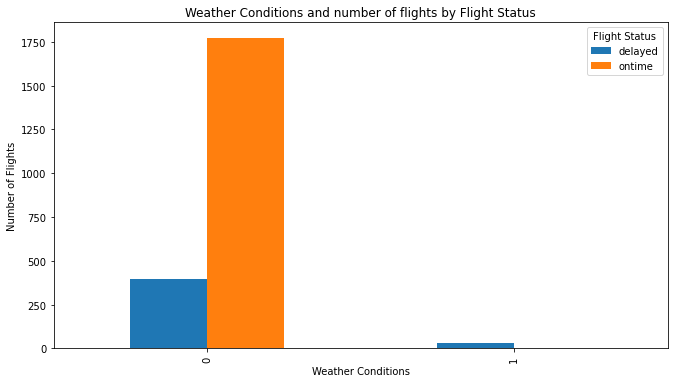

In [ ]:
#Plot pivot table 1 showing weather conditions against flight status
plot1 = df_exploration.pivot_table(index='Weather',columns= 'Flight Status', values="DEST",  aggfunc=len, fill_value=0) 
plot1.plot.bar(title='Weather Conditions and number of flights by Flight Status', xlabel='Weather Conditions',
                  ylabel='Number of Flights', figsize=(11, 6))

In [ ]:
#Most flights happen when weather conditons are good. ALL flights were delayed when conditions weren't good.

In [ ]:
#Pivot table to compare Origin and hour of the day wih flight status
pivot2 = df_exploration.pivot_table(index=['ORIGIN'],columns= 'Flight Status', values="DEST",  aggfunc=len, fill_value=0) 
#Calculate percentage of delayed flights by row
pivot2['total'] = pivot2['delayed']+pivot2['ontime']
pivot2['percentage'] =pivot2['delayed']/pivot2['total']*100
pivot2.round(1)

Flight Status,delayed,ontime,total,percentage
ORIGIN,,,,
BWI,37,108,145,25.5
DCA,221,1149,1370,16.1
IAD,170,516,686,24.8


<AxesSubplot:title={'center':'Flight Origin and number of flights by Flight Status'}, xlabel='Airport of Origin', ylabel='Number of Flights'>

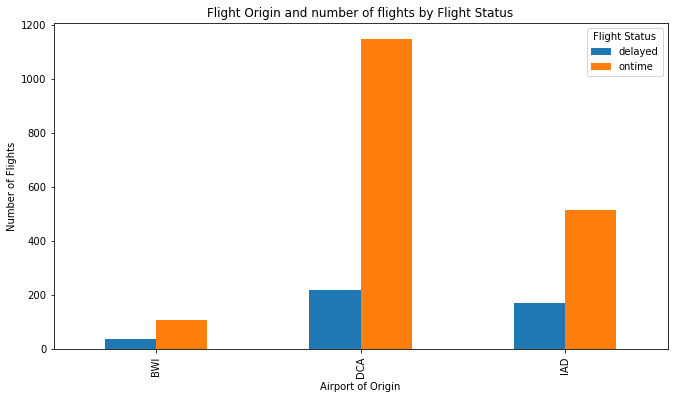

In [ ]:
#Plot 2 to compare Origin with flight status
plot2 = df_exploration.pivot_table(index=['ORIGIN'],columns= 'Flight Status', values="DEST",  aggfunc=len, fill_value=0)
plot2.plot.bar(title='Flight Origin and number of flights by Flight Status', xlabel='Airport of Origin',
                  ylabel='Number of Flights', figsize=(11, 6))


In [ ]:
#Most flights depart from DCA, however the delayed rate is high in BWI with 25.5%, similar to IAD with 24.8% of flights delayed

In [ ]:
#Pivot table to compare hour of the day with flight status
pivot3 = df_exploration.pivot_table(index=['DAY_HR'],columns= 'Flight Status', values="DEST",  aggfunc=len, fill_value=0) 
#Calculate percentage of delayed flights by row
pivot3['total'] = pivot3['delayed']+pivot3['ontime']
pivot3['percentage'] =pivot3['delayed']/pivot3['total']*100
pivot3.round(1)

Flight Status,delayed,ontime,total,percentage
DAY_HR,,,,
Early Afternoon,121,426,547,22.1
Early Morning,76,455,531,14.3
Evening,83,226,309,26.9
Late Afternoon,108,396,504,21.4
Late Morning,40,270,310,12.9


<AxesSubplot:title={'center':'Hour of the day and number of flights by Flight Status'}, xlabel='Hour of the Day', ylabel='Number of Flights'>

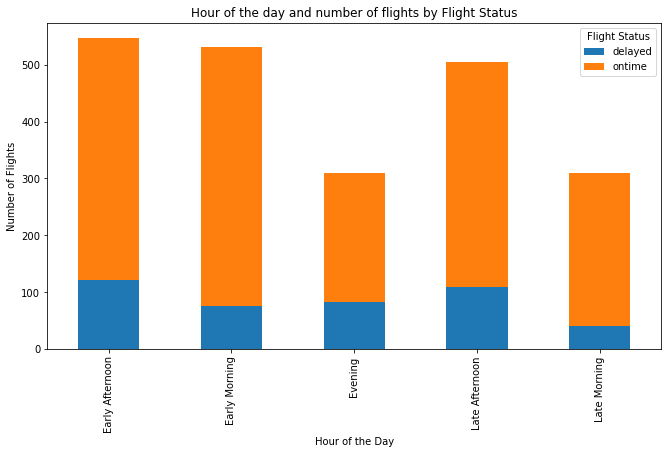

In [ ]:
#Pivot table to compare Hour of the day with flight status
plot3 = df_exploration.pivot_table(index=['DAY_HR'],columns= 'Flight Status', values="DEST",  aggfunc=len, fill_value=0) 
plot3.plot.bar(stacked=True,title='Hour of the day and number of flights by Flight Status', xlabel='Hour of the Day',
                  ylabel='Number of Flights', figsize=(11, 6))

In [ ]:
#Most flights are schedule in the early morning, early afternoon or late afternoon
#The largest percentage of delayed flights happens in the Evening (26.9%)

In [ ]:
#Pivot table to compare hour of the Destnation with flight status
pivot4 = df_exploration.pivot_table(index=['DEST'],columns= 'Flight Status', values="ORIGIN",  aggfunc=len, fill_value=0) 
#Calculate percentage of delayed flights by row
pivot4['total'] = pivot4['delayed']+pivot4['ontime']
pivot4['percentage'] =pivot4['delayed']/pivot4['total']*100
pivot4.round(1)

Flight Status,delayed,ontime,total,percentage
DEST,,,,
EWR,161,504,665,24.2
JFK,84,302,386,21.8
LGA,183,967,1150,15.9


<AxesSubplot:title={'center':'Destination and number of flights by Flight Status'}, xlabel='Hour of the Day', ylabel='Number of Flights'>

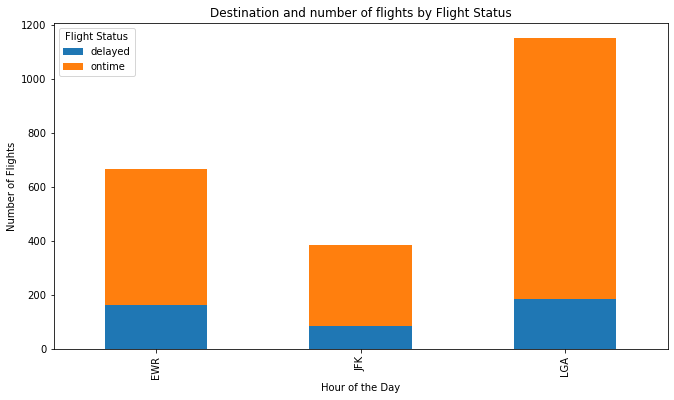

In [ ]:
#Bar plot to compare Hour of the destination with flight status
plot4 = df_exploration.pivot_table(index=['DEST'],columns= 'Flight Status', values="ORIGIN",  aggfunc=len, fill_value=0)  
plot4.plot.bar(stacked=True,title='Destination and number of flights by Flight Status', xlabel='Hour of the Day',
                  ylabel='Number of Flights', figsize=(11, 6))

In [ ]:
#EWR is the destination with the largest percentage of delayed flights with 24.2
#LGA is the destination with the greatest number of flights in general and the lowest percentage of delayed flights

In [ ]:
#Pivot table to compare flight number with flight status
pivot5 = df_exploration.pivot_table(index=['FL_NUM'],columns= 'Flight Status', values="ORIGIN",  aggfunc=len, fill_value=0) 
#Calculate percentage of delayed flights by row
pivot5['total'] = pivot5['delayed']+pivot5['ontime']
pivot5['percentage'] =pivot5['delayed']/pivot5['total']*100
pivot5.round(1).sort_values(by='percentage', ascending=False).head(10)

Flight Status,delayed,ontime,total,percentage
FL_NUM,,,,
2603,1,0,1,100.0
7211,14,8,22,63.6
814,11,9,20,55.0
4976,12,11,23,52.2
2336,2,2,4,50.0
810,2,2,4,50.0
746,15,16,31,48.4
4970,8,9,17,47.1
3372,11,13,24,45.8


In [ ]:
#There are 6 flight numbers with 50% or more flights delayed

## Machine Learning Models

In [ ]:
# Loading Training Data
df1 = pd.read_csv('FlightDelaysTrainingData.csv')

## Generating Test dataset

In [ ]:
# Randon selection of 5 carriers and flight number together

carrier_flNum = df1[['CARRIER','FL_NUM']].sample(5)

In [ ]:
# Create a dictionary with carriers and their flight number
data = {'CARRIER':carrier_flNum['CARRIER'],
        'DEST':random.choices(df1['DEST'],k=5),
        'FL_NUM':carrier_flNum['FL_NUM'],
        'Weather':random.choices(df1['Weather'],k=5),
        'DAY_OF_MONTH':random.choices(df1['DAY_OF_MONTH'],k=5),
        'DAY_HR':random.choices(df1['DAY_HR'],k=5),
        'ORIGIN':random.choices(df1['ORIGIN'],k=5),
        'Flight Status':random.choices(df1['Flight Status'],k=5)}

In [ ]:
df_test = pd.DataFrame(data=data)
df_test

,CARRIER,DEST,FL_NUM,Weather,DAY_OF_MONTH,DAY_HR,ORIGIN,Flight Status
782,DL,JFK,1756,0,15,Early Morning,BWI,ontime
1415,DH,LGA,7302,0,19,Early Afternoon,DCA,ontime
1430,RU,EWR,2855,0,7,Early Afternoon,DCA,ontime
383,RU,LGA,2261,0,2,Evening,DCA,ontime
2151,OH,EWR,5935,0,23,Late Afternoon,DCA,ontime


In [ ]:
df_test = df1.sample(5)

In [ ]:
df_test.columns

Index(['CARRIER', 'DEST', 'FL_NUM', 'Weather', 'DAY_OF_MONTH', 'DAY_HR',
       'ORIGIN', 'Flight Status'],
      dtype='object')

In [ ]:
# transform numerical to categorical
df_test[['FL_NUM','Weather','DAY_OF_MONTH']]= df_test[['FL_NUM','Weather','DAY_OF_MONTH']].astype('category')

In [ ]:
# identify predictors and target
predictor = df_test.columns.drop('Flight Status')
outcome ='Flight Status'


X_test = pd.read_csv('FlightDelaysTestingData.csv')
y_test = df_test['Flight Status'].astype('category')
classes = list(y_test.cat.categories)


In [ ]:
X_test

,CARRIER_CO,CARRIER_DH,CARRIER_DL,CARRIER_MQ,CARRIER_OH,CARRIER_RU,CARRIER_UA,CARRIER_US,DEST_EWR,DEST_JFK,...,DAY_OF_MONTH_30,DAY_OF_MONTH_31,DAY_HR_Early Afternoon,DAY_HR_Early Morning,DAY_HR_Evening,DAY_HR_Late Afternoon,DAY_HR_Late Morning,ORIGIN_BWI,ORIGIN_DCA,ORIGIN_IAD
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
X_test

,CARRIER_CO,CARRIER_DH,CARRIER_DL,CARRIER_MQ,CARRIER_OH,CARRIER_RU,CARRIER_UA,CARRIER_US,DEST_EWR,DEST_JFK,...,DAY_OF_MONTH_30,DAY_OF_MONTH_31,DAY_HR_Early Afternoon,DAY_HR_Early Morning,DAY_HR_Evening,DAY_HR_Late Afternoon,DAY_HR_Late Morning,ORIGIN_BWI,ORIGIN_DCA,ORIGIN_IAD
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
y_test

1810    delayed
572      ontime
1067     ontime
1065    delayed
1638    delayed
Name: Flight Status, dtype: category
Categories (2, object): ['delayed', 'ontime']

## Preprocessing dataset

In [ ]:
# Categorical Data
df1 = pd.read_csv('FlightDelaysTrainingData.csv')

In [ ]:
df1.columns

Index(['CARRIER', 'DEST', 'FL_NUM', 'Weather', 'DAY_OF_MONTH', 'DAY_HR',
       'ORIGIN', 'Flight Status'],
      dtype='object')

In [ ]:
# transform numerical to categorical
df1[['FL_NUM','Weather','DAY_OF_MONTH']]= df1[['FL_NUM','Weather','DAY_OF_MONTH']].astype('category')

In [ ]:
# identify predictors and target
predictors = df1.columns.drop('Flight Status')
outcome ='Flight Status'


X = pd.get_dummies(df1[predictors])
y = df1['Flight Status'].astype('category')
classes = list(y.cat.categories)


In [ ]:
# split into training and validation
X_train, X_valid, y_train, y_valid = train_test_split(X, y, 
                                                      test_size=0.40,
                                                      random_state=1)
 


## Naive Bayes

In [ ]:
# Import packages for Naive Bayes

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from dmba import classificationSummary

In [ ]:
# run naive Bayes
delays_nb = MultinomialNB(alpha=0.01)
delays_nb.fit(X_train, y_train)


MultinomialNB(alpha=0.01)

In [ ]:

# predict probabilities
predProb_train = delays_nb.predict_proba(X_train)
predProb_valid = delays_nb.predict_proba(X_valid)

# predict class membership
y_train_pred = delays_nb.predict(X_train)
y_valid_pred = delays_nb.predict(X_valid)


In [ ]:
print('Training')
classificationSummary(y_train, y_train_pred, class_names=classes) 
print(' ')
print('Validation')
classificationSummary(y_valid, y_valid_pred, class_names=classes) 


Training
Confusion Matrix (Accuracy 0.8197)

        Prediction
 Actual delayed  ontime
delayed     132     129
 ontime     109     950
 
Validation
Confusion Matrix (Accuracy 0.7946)

        Prediction
 Actual delayed  ontime
delayed      83      84
 ontime      97     617


### Testing Dataset for Naive Bayes 

In [ ]:
print('Validation')
classificationSummary(y_test, delays_nb.predict(X_test), class_names=classes) 

Validation
Confusion Matrix (Accuracy 0.6000)

        Prediction
 Actual delayed  ontime
delayed       3       0
 ontime       2       0


C:\Users\kadam\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Weather_Bad
- Weather_Good
Feature names seen at fit time, yet now missing:
- Weather_0
- Weather_1

  warnings.warn(message, FutureWarning)


# Logistic Regression

In [ ]:
# import packages for logistic regression
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from dmba import classificationSummary
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
# Perform Logistic regression
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [ ]:
# Make prediction using the model 
# perform prediction using the test dataset

y_train_pred = log_reg.predict(X_train)
y_valid_pred = log_reg.predict(X_valid) 

Training
Confusion Matrix (Accuracy 0.8447)

        Prediction
 Actual delayed  ontime
delayed      84     177
 ontime      28    1031
Validation
Confusion Matrix (Accuracy 0.8320)

        Prediction
 Actual delayed  ontime
delayed      51     116
 ontime      32     682


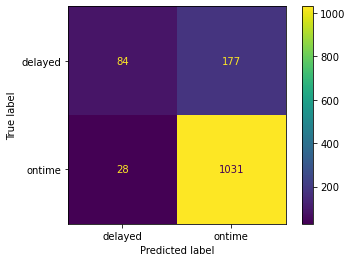

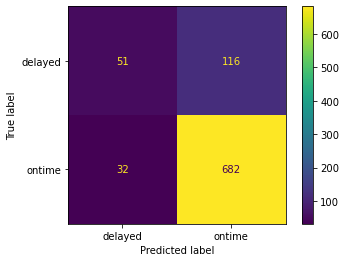

In [ ]:
print('Training')
classificationSummary(y_train, y_train_pred, class_names=classes) 
ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred)
print('Validation')
classificationSummary(y_valid, y_valid_pred, class_names=classes) 
ConfusionMatrixDisplay.from_predictions(y_valid,y_valid_pred)

### Testing Dataset for Logistic Regression 

In [ ]:
y_test_pred = log_reg.predict(X_test) 

C:\Users\kadam\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Weather_Bad
- Weather_Good
Feature names seen at fit time, yet now missing:
- Weather_0
- Weather_1

  warnings.warn(message, FutureWarning)


In [ ]:
print('Testing')
classificationSummary(y_test, log_reg.predict(X_test), class_names=classes) 

Testing
Confusion Matrix (Accuracy 0.8000)

        Prediction
 Actual delayed  ontime
delayed       3       0
 ontime       1       1


C:\Users\kadam\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Weather_Bad
- Weather_Good
Feature names seen at fit time, yet now missing:
- Weather_0
- Weather_1

  warnings.warn(message, FutureWarning)


## CART - Classification and Regression Tree

In [ ]:
# import packages

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
#from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
#from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from dmba import plotDecisionTree, classificationSummary, regressionSummary

In [ ]:
# Numerical Data # DELETE AFTER PAULA'S PART AT BEGGINING
df2 = pd.read_csv('FlightDelaysTrainingData2.csv')

In [ ]:
df2.head()


,CARRIER,DEST,FL_NUM,Weather,DAY_OF_MONTH,DAY_HR,ORIGIN,Flight Status
0,4,1,5935,0,1,0,0,1
1,1,1,6155,0,1,3,1,1
2,1,2,7208,0,1,4,2,1
3,1,2,7215,0,1,3,2,1
4,1,2,7792,0,1,4,2,1


In [ ]:
X = df2.drop(columns = ['Flight Status'])
y = df2['Flight Status']

train_X, valid_X, train_y, valid_y = train_test_split(X, y, 
                                                      test_size=0.4, 
                                                      random_state=1)

In [ ]:
decisiontree = DecisionTreeClassifier(random_state=0,max_depth=4)     

DT_model = decisiontree.fit(X, y)
DT_model

DecisionTreeClassifier(max_depth=4, random_state=0)

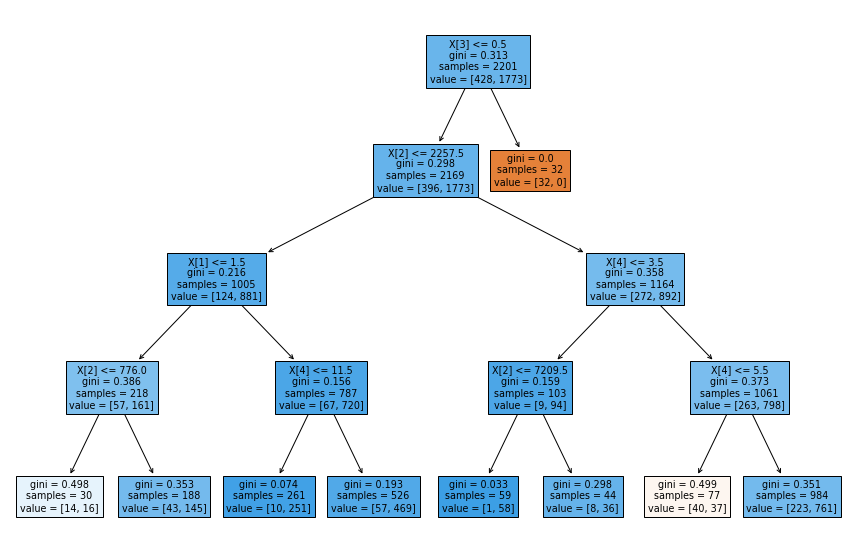

In [ ]:
fig = plt.figure(figsize=(15,10))
tree.plot_tree(DT_model, filled=True)
plt.show()


In [ ]:
print('Training')
classificationSummary(train_y, decisiontree.predict(train_X))
print(' ')
print('Validation')
classificationSummary(valid_y, decisiontree.predict(valid_X))
print(' ')


Training
Confusion Matrix (Accuracy 0.8159)

       Prediction
Actual    0    1
     0   37  224
     1   19 1040
 
Validation
Confusion Matrix (Accuracy 0.8297)

       Prediction
Actual   0   1
     0  35 132
     1  18 696
 


### Test for CART

In [ ]:
df_test=df2.sample(5)

In [ ]:
X_test2 = df_test.drop(columns = ['Flight Status'])
y_test2 = df_test['Flight Status']

In [ ]:
print('Test')
classificationSummary(y_test2, decisiontree.predict(X_test2))
print(' ')

Test
Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual 0
     0 5
 
